<a href="https://colab.research.google.com/github/Saaia03/pr_1/blob/main/%D0%9B%D0%B0%D0%B1_3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas scikit-learn seaborn scipy

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.feature_selection import SelectKBest, chi2, RFE, SelectFromModel

In [3]:
# Загрузка набора данных
df = pd.read_csv('/content/diamond.csv')

In [4]:
df

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171
...,...,...,...,...,...,...,...,...
5995,1.03,Ideal,D,SI1,EX,EX,GIA,6250
5996,1.00,Very Good,D,SI1,VG,VG,GIA,5328
5997,1.02,Ideal,D,SI1,EX,EX,GIA,6157
5998,1.27,Signature-Ideal,G,VS1,EX,EX,GIA,11206


In [7]:
# Определение соответствий для замены Symmetry
symmetry_mapping = {'EX': 1, 'ID': 2, 'VG': 3, 'G': 4}

# Замена Symmetry
df['Symmetry'] = df['Symmetry'].replace(symmetry_mapping)

# Определение соответствий для замены Clarity
clarity_mapping = {'FL': 10, 'IF': 20, 'VVS1': 30, 'VVS2': 40, 'VS1': 50, 'VS2':60, 'SI1':70}

# Замена Clarity
df['Clarity'] = df['Clarity'].replace(clarity_mapping)

# Определение соответствий для замены Cut
cut_mapping = {'Fair': 20, 'Good': 40, 'Very Good': 60, 'Ideal': 80, 'Signature-Ideal': 100}

# Замена Cut
df['Cut'] = df['Cut'].replace(cut_mapping)

# Определение соответствий для замены Color
color_mapping = {'D': 1, 'E': 2, 'F': 3, 'G': 4, 'H': 5, 'I': 6}

# Замена Color
df['Color'] = df['Color'].replace(color_mapping)

# Определение соответствий для замены Polish
polish_mapping = {'EX': 1, 'ID': 2, 'VG': 3, 'G': 4}

# Замена Polish
df['Polish'] = df['Polish'].replace(polish_mapping)

<ipython-input-7-c260d880470b>:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Cut'] = df['Cut'].replace(cut_mapping)


In [8]:
df

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,80,5,70,3,1,GIA,5169
1,0.83,80,5,50,2,2,AGSL,3470
2,0.85,80,5,70,1,1,GIA,3183
3,0.91,80,2,70,3,3,GIA,4370
4,0.83,80,4,70,1,1,GIA,3171
...,...,...,...,...,...,...,...,...
5995,1.03,80,1,70,1,1,GIA,6250
5996,1.00,60,1,70,3,3,GIA,5328
5997,1.02,80,1,70,1,1,GIA,6157
5998,1.27,100,4,50,1,1,GIA,11206


In [9]:
df['best_diamond'] = np.where(df['Color'] >= 6, 1, 0)
df.best_diamond = df.best_diamond.astype('category')
df['Report'] = df['Report'].astype('category')

In [11]:
Y = df['best_diamond'] # выбираем целевую переменную (категориальную)
X = df.drop('best_diamond', axis=1) # переменные для проверки влияния

# В моем случае я дропаю базовую переменную, а не только. Y
X = X.drop('Color', axis=1)

In [12]:
df.drop('Color', axis=1).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Carat Weight  6000 non-null   float64 
 1   Cut           6000 non-null   int64   
 2   Clarity       6000 non-null   int64   
 3   Polish        6000 non-null   int64   
 4   Symmetry      6000 non-null   int64   
 5   Report        6000 non-null   category
 6   Price         6000 non-null   int64   
 7   best_diamond  6000 non-null   category
dtypes: category(2), float64(1), int64(5)
memory usage: 293.3 KB


In [13]:
df

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price,best_diamond
0,1.10,80,5,70,3,1,GIA,5169,0
1,0.83,80,5,50,2,2,AGSL,3470,0
2,0.85,80,5,70,1,1,GIA,3183,0
3,0.91,80,2,70,3,3,GIA,4370,0
4,0.83,80,4,70,1,1,GIA,3171,0
...,...,...,...,...,...,...,...,...,...
5995,1.03,80,1,70,1,1,GIA,6250,0
5996,1.00,60,1,70,3,3,GIA,5328,0
5997,1.02,80,1,70,1,1,GIA,6157,0
5998,1.27,100,4,50,1,1,GIA,11206,0


2. Масштабирование признаков

In [14]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Carat Weight  6000 non-null   float64 
 1   Cut           6000 non-null   int64   
 2   Clarity       6000 non-null   int64   
 3   Polish        6000 non-null   int64   
 4   Symmetry      6000 non-null   int64   
 5   Report        6000 non-null   category
 6   Price         6000 non-null   int64   
dtypes: category(1), float64(1), int64(5)
memory usage: 287.4 KB


In [15]:
# Создаем копию данных
X_processed = X.copy()

category_columns: list[str] = X_processed.select_dtypes(include=['category']).columns # собираем колонки помеченные как category

# Применяем One-Hot Encoding
X_processed = pd.get_dummies(X_processed, columns=category_columns,drop_first=True) # drop_first=True позволяет избежать мультиколлинеарности, удаляя первый уровень категориальной переменной.

In [16]:
X_processed

,Carat Weight,Cut,Clarity,Polish,Symmetry,Price,Report_GIA
0,1.10,80,70,3,1,5169,True
1,0.83,80,50,2,2,3470,False
2,0.85,80,70,1,1,3183,True
3,0.91,80,70,3,3,4370,True
4,0.83,80,70,1,1,3171,True
...,...,...,...,...,...,...,...
5995,1.03,80,70,1,1,6250,True
5996,1.00,60,70,3,3,5328,True
5997,1.02,80,70,1,1,6157,True
5998,1.27,100,50,1,1,11206,True


In [17]:
# Выбираем числовые признаки
numeric_features = X_processed.select_dtypes(include=['float64']).columns.tolist()

# Инициализируем scaler
scaler = MinMaxScaler()

# Применяем нормализацию
X_processed[numeric_features] = scaler.fit_transform(X_processed[numeric_features])

In [18]:
X_processed

,Carat Weight,Cut,Clarity,Polish,Symmetry,Price,Report_GIA
0,0.162037,80,70,3,1,5169,True
1,0.037037,80,50,2,2,3470,False
2,0.046296,80,70,1,1,3183,True
3,0.074074,80,70,3,3,4370,True
4,0.037037,80,70,1,1,3171,True
...,...,...,...,...,...,...,...
5995,0.129630,80,70,1,1,6250,True
5996,0.115741,60,70,3,3,5328,True
5997,0.125000,80,70,1,1,6157,True
5998,0.240741,100,50,1,1,11206,True


3. Очистка данных и удаление выбросов

In [19]:
from sklearn.model_selection import cross_val_score

def train_and_evaluate(X, Y):
    # Разделение данных на обучающую и тестовую выборки
    X_train, X_test, Y_train, Y_test = train_test_split(
        X, Y, test_size=0.2, random_state=42, stratify=Y)

    # Инициализация модели
    model = LogisticRegression(max_iter=1000)

    # Обучение модели
    model.fit(X_train, Y_train)

    # Предсказания на обучающей выборке
    Y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(Y_train, Y_train_pred)

    # Предсказания на тестовой выборке
    Y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(Y_test, Y_test_pred)

    # Вывод результатов
    print(f"Точность на обучающей выборке: {train_accuracy:.4f}")
    print(f"Точность на тестовой выборке: {test_accuracy:.4f}")

    # Классификационный отчет
    print("\nКлассификационный отчет на тестовой выборке:")
    print(classification_report(Y_test, Y_test_pred))

    return model

In [20]:
train_and_evaluate (X_processed, Y)

Точность на обучающей выборке: 0.8965
Точность на тестовой выборке: 0.8900

Классификационный отчет на тестовой выборке:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      1006
           1       0.93      0.35      0.50       194

    accuracy                           0.89      1200
   macro avg       0.91      0.67      0.72      1200
weighted avg       0.89      0.89      0.87      1200



LogisticRegression(max_iter=1000)

Метод 1. Удаление на основе медианы

In [21]:
# Функция для удаления выбросов на основе межквартильного размаха (1.5 IQR)
def remove_outliers_based_on_iqr(X, y, iqr_multiplier=1.5):
    # Убедимся, что работаем только с числовыми данными
    X_numeric = X.select_dtypes(include=['number'])

    # Рассчитываем первый и третий квартили для каждой числовой переменной
    Q1 = X_numeric.quantile(0.25)
    Q3 = X_numeric.quantile(0.75)

    # Вычисляем межквартильный размах (IQR)
    IQR = Q3 - Q1

    # Оставляем только те значения, которые находятся в диапазоне [Q1 - 1.5*IQR, Q3 + 1.5*IQR]
    X_filtered = X_numeric[~((X_numeric < (Q1 - iqr_multiplier * IQR)) | (X_numeric > (Q3 + iqr_multiplier * IQR))).any(axis=1)]

    # Синхронизируем y с отфильтрованными X
    y_filtered = y.loc[X_filtered.index]

    return X_filtered, y_filtered

In [22]:
X_iqr, y_iqr = remove_outliers_based_on_iqr(X_processed, Y, iqr_multiplier=3)

In [23]:
X_processed.describe()

,Carat Weight,Cut,Clarity,Polish,Symmetry,Price
count,6000.000000,6000.00000,6000.000000,6000.000000,6000.000000,6000.000000
mean,0.270611,66.74000,56.306667,2.187667,2.365000,11791.579333
std,0.220230,16.40581,13.703671,1.072989,1.106185,10184.350051
min,0.000000,20.00000,10.000000,1.000000,1.000000,2184.000000
25%,0.115741,60.00000,50.000000,1.000000,1.000000,5150.500000
50%,0.175926,60.00000,60.000000,2.000000,3.000000,7857.000000
75%,0.388889,80.00000,70.000000,3.000000,3.000000,15036.500000
max,1.000000,100.00000,70.000000,4.000000,4.000000,101561.000000


In [24]:
X_iqr.describe()

,Carat Weight,Cut,Clarity,Polish,Symmetry,Price
count,5910.000000,5910.000000,5910.000000,5910.000000,5910.000000,5910.000000
mean,0.264031,66.646362,56.692047,2.190186,2.368697,11108.867513
std,0.214878,16.441463,13.384896,1.073239,1.106574,8488.550210
min,0.000000,20.000000,10.000000,1.000000,1.000000,2184.000000
25%,0.115741,60.000000,50.000000,1.000000,1.000000,5115.250000
50%,0.171296,60.000000,60.000000,2.000000,3.000000,7709.500000
75%,0.375000,80.000000,70.000000,3.000000,3.000000,14328.500000
max,1.000000,100.000000,70.000000,4.000000,4.000000,44487.000000


In [25]:
train_and_evaluate(X_iqr, y_iqr)

Точность на обучающей выборке: 0.8949
Точность на тестовой выборке: 0.8866

Классификационный отчет на тестовой выборке:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94       988
           1       0.98      0.31      0.48       194

    accuracy                           0.89      1182
   macro avg       0.93      0.66      0.71      1182
weighted avg       0.90      0.89      0.86      1182



LogisticRegression(max_iter=1000)

Вес в каратах: снизилась с 0,2706 до 0,2640
Цена: снизилась с 11791,58 до 11108,87
Общее количество записей уменьшалось с 6000 до 5910
Остальные переменные стабильны
Метод удаления на основе медианы оказался эффективным для удаления данных о бриллиантах, что улучшило качество анализа без значительного изменения характеристики основной структуры.

Метод 2. Удаление на основе среднего

In [26]:
# Функция для удаления выбросов на основе среднего значения

def remove_outliers_based_on_mean(X, y, mean_multiplier=2):
    # Убедимся, что работаем только с числовыми данными
    X_numeric = X.select_dtypes(include=['number'])

    # Рассчитываем среднее значение и стандартное отклонение для каждой переменной
    mean_values = X_numeric.mean()
    std_values = X_numeric.std()

    # Устанавливаем верхний и нижний пороги на основе среднего значения и множителя стандартного отклонения
    lower_threshold = mean_values - mean_multiplier * std_values
    upper_threshold = mean_values + mean_multiplier * std_values

    # Фильтруем наблюдения, которые находятся в пределах этих порогов по всем признакам
    X_filtered = X_numeric[~((X_numeric < lower_threshold) | (X_numeric > upper_threshold)).any(axis=1)]

    # Синхронизируем y с отфильтрованными X
    y_filtered = y.loc[X_filtered.index]

    return X_filtered, y_filtered

In [27]:
X_mean, y_mean = remove_outliers_based_on_mean(X_processed.copy(), Y.copy())

In [28]:
X_processed.describe()

,Carat Weight,Cut,Clarity,Polish,Symmetry,Price
count,6000.000000,6000.00000,6000.000000,6000.000000,6000.000000,6000.000000
mean,0.270611,66.74000,56.306667,2.187667,2.365000,11791.579333
std,0.220230,16.40581,13.703671,1.072989,1.106185,10184.350051
min,0.000000,20.00000,10.000000,1.000000,1.000000,2184.000000
25%,0.115741,60.00000,50.000000,1.000000,1.000000,5150.500000
50%,0.175926,60.00000,60.000000,2.000000,3.000000,7857.000000
75%,0.388889,80.00000,70.000000,3.000000,3.000000,15036.500000
max,1.000000,100.00000,70.000000,4.000000,4.000000,101561.000000


In [29]:
X_mean.describe()

,Carat Weight,Cut,Clarity,Polish,Symmetry,Price
count,5079.000000,5079.000000,5079.000000,5079.000000,5079.000000,5079.000000
mean,0.245654,65.946052,58.247687,2.211656,2.389644,9949.201811
std,0.195535,13.804101,11.670314,1.087495,1.111001,6912.903697
min,0.000000,40.000000,30.000000,1.000000,1.000000,2184.000000
25%,0.115741,60.000000,50.000000,1.000000,1.000000,5011.000000
50%,0.162037,60.000000,60.000000,3.000000,3.000000,7191.000000
75%,0.356481,80.000000,70.000000,3.000000,3.000000,12473.500000
max,0.708333,80.000000,70.000000,4.000000,4.000000,32149.000000


In [30]:
train_and_evaluate(X_mean, y_mean)

Точность на обучающей выборке: 0.8868
Точность на тестовой выборке: 0.8760

Классификационный отчет на тестовой выборке:
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       844
           1       0.94      0.28      0.44       172

    accuracy                           0.88      1016
   macro avg       0.91      0.64      0.68      1016
weighted avg       0.88      0.88      0.85      1016



LogisticRegression(max_iter=1000)

Вес в каратах: 0,2706 --> 0,2457
Огранка: 66,74 --> 65,95
Чистота: 56,31 --> 58,25
Цена: 11791,58 --> 9949,20
Количество записей: 6000 --> 5079
Метод удаления на основе среднего оказался эффективным

3. Методы отбора признаков

1) Filter методы

In [31]:
from sklearn.feature_selection import SelectKBest, f_regression

In [32]:
# Применяем SelectKBest для выбора 5 лучших признаков
selector = SelectKBest(score_func=f_regression, k=10)
X_kbest = selector.fit_transform(X_processed, Y)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:779: UserWarning: k=10 is greater than n_features=7. All the features will be returned.
  warnings.warn(


In [33]:
selector.scores_

array([20.41048912,  0.86869168, 26.75068944,  2.93176707,  0.43046658,
       88.64143496, 31.87728013])

In [34]:
X_processed.columns

Index(['Carat Weight', 'Cut', 'Clarity', 'Polish', 'Symmetry', 'Price',
       'Report_GIA'],
      dtype='object')

In [35]:
X_processed

,Carat Weight,Cut,Clarity,Polish,Symmetry,Price,Report_GIA
0,0.162037,80,70,3,1,5169,True
1,0.037037,80,50,2,2,3470,False
2,0.046296,80,70,1,1,3183,True
3,0.074074,80,70,3,3,4370,True
4,0.037037,80,70,1,1,3171,True
...,...,...,...,...,...,...,...
5995,0.129630,80,70,1,1,6250,True
5996,0.115741,60,70,3,3,5328,True
5997,0.125000,80,70,1,1,6157,True
5998,0.240741,100,50,1,1,11206,True


In [36]:
selector.get_support(indices=True)

array([0, 1, 2, 3, 4, 5, 6])

In [37]:
# Получаем список отобранных признаков
selected_features = X_processed.columns[selector.get_support(indices=True)]
print("Отобранные признаки:", selected_features)

Отобранные признаки: Index(['Carat Weight', 'Cut', 'Clarity', 'Polish', 'Symmetry', 'Price',
       'Report_GIA'],
      dtype='object')


In [38]:
# Преобразуем X_kbest в DataFrame
X_kbest_df = pd.DataFrame(X_kbest, columns=selected_features)

# Обучаем и оцениваем модель
train_and_evaluate(X_kbest_df, Y)

Точность на обучающей выборке: 0.8965
Точность на тестовой выборке: 0.8900

Классификационный отчет на тестовой выборке:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      1006
           1       0.93      0.35      0.50       194

    accuracy                           0.89      1200
   macro avg       0.91      0.67      0.72      1200
weighted avg       0.89      0.89      0.87      1200



LogisticRegression(max_iter=1000)

2) Wrapper методы

In [39]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Инициализируем модель логистической регрессии
base_model = LogisticRegression(max_iter=1000)

# Инициализируем RFE для выбора 5 лучших признаков
rfe = RFE(estimator=base_model, n_features_to_select=5)
rfe.fit(X_processed, Y)

# Получаем список отобранных признаков
selected_features = X_processed.columns[rfe.support_]
print("Отобранные признаки:", selected_features)

Отобранные признаки: Index(['Carat Weight', 'Clarity', 'Polish', 'Symmetry', 'Report_GIA'], dtype='object')


In [40]:
# Отбираем признаки
X_rfe = X_processed[selected_features]

# Обучаем и оцениваем модель
model = train_and_evaluate(X_rfe, Y)

Точность на обучающей выборке: 0.8387
Точность на тестовой выборке: 0.8383

Классификационный отчет на тестовой выборке:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1006
           1       0.00      0.00      0.00       194

    accuracy                           0.84      1200
   macro avg       0.42      0.50      0.46      1200
weighted avg       0.70      0.84      0.76      1200



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


3) Embedded методы

Коэффициенты модели без регуляризации: [[ 2.17517174e+01  1.22330731e-02 -4.36754661e-02 -2.76664108e-02
  -4.60247562e-02 -7.61253661e-04 -3.90465522e-01]]
Коэффициенты модели с регуляризацией: [[ 4.24165523e+01  2.28201356e-02 -8.20048015e-02 -1.07910386e-01
  -5.07608370e-02 -1.53261259e-03 -3.89357643e-01]]
Отобранные признаки: Index(['Carat Weight', 'Cut', 'Clarity', 'Polish', 'Symmetry', 'Price',
       'Report_GIA'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Коэффициенты модели после отбора признаков: [[ 4.46226388e+01  2.16981098e-02 -8.79568452e-02 -1.22120893e-01
  -6.71078181e-02 -1.61868581e-03 -4.28614763e-01]]


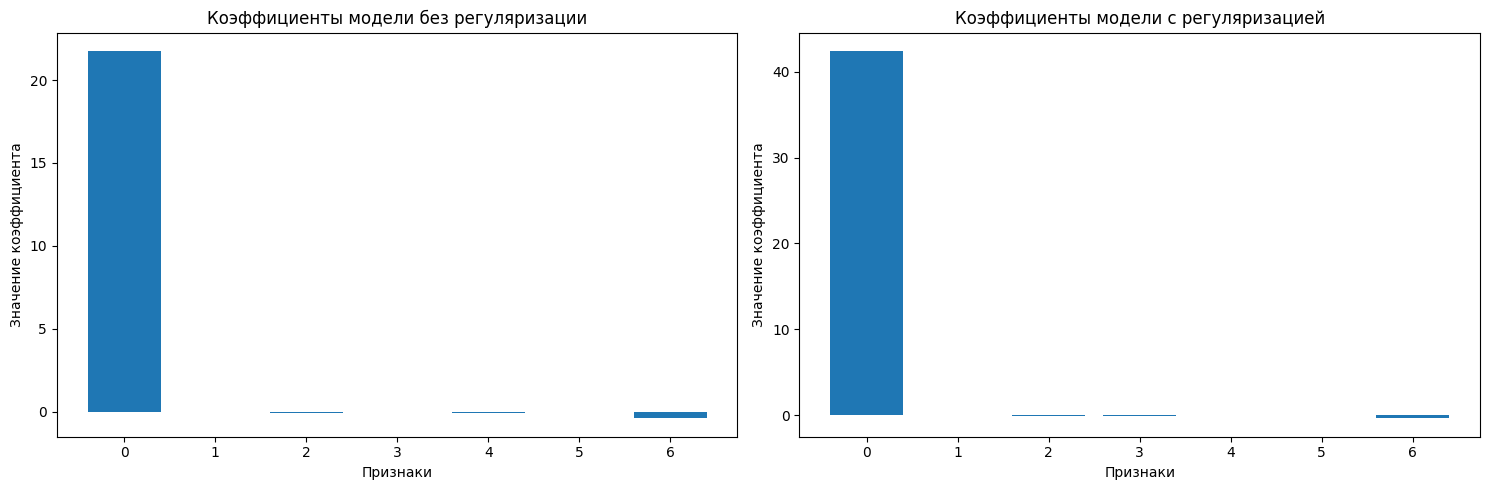

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
import numpy as np
import matplotlib.pyplot as plt

# Обучаем модель без регуляризации
model_no_penalty = LogisticRegression(solver='lbfgs', max_iter=1000)
model_no_penalty.fit(X_processed, Y)

# Выводим коэффициенты модели без регуляризации
coefficients_no_penalty = model_no_penalty.coef_
print("Коэффициенты модели без регуляризации:", coefficients_no_penalty)

# Инициализируем модель с L1-регуляризацией
model_with_penalty = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000)

# Обучаем модель с регуляризацией
model_with_penalty.fit(X_processed, Y)

# Выводим коэффициенты модели с регуляризацией
coefficients_with_penalty = model_with_penalty.coef_
print("Коэффициенты модели с регуляризацией:", coefficients_with_penalty)

# Используем SelectFromModel для отбора признаков
selector = SelectFromModel(model_with_penalty, prefit=True)
X_embedded = selector.transform(X_processed)

# Получаем список отобранных признаков
selected_features = X_processed.columns[selector.get_support()]
print("Отобранные признаки:", selected_features)

# Обучаем модель на отобранных признаках
model_embedded = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000)
model_embedded.fit(X_embedded, Y)

# Выводим коэффициенты модели после отбора признаков
coefficients_embedded = model_embedded.coef_
print("Коэффициенты модели после отбора признаков:", coefficients_embedded)

# Визуализация коэффициентов моделей
plt.figure(figsize=(15, 5))

# Коэффициенты модели без регуляризации
plt.subplot(1, 2, 1)
plt.bar(range(len(coefficients_no_penalty[0])), coefficients_no_penalty[0])
plt.title("Коэффициенты модели без регуляризации")
plt.xlabel("Признаки")
plt.ylabel("Значение коэффициента")

# Коэффициенты модели с регуляризацией
plt.subplot(1, 2, 2)
plt.bar(range(len(coefficients_with_penalty[0])), coefficients_with_penalty[0])
plt.title("Коэффициенты модели с регуляризацией")
plt.xlabel("Признаки")
plt.ylabel("Значение коэффициента")

plt.tight_layout()
plt.show()

In [42]:
# Преобразуем X_embedded в DataFrame
X_embedded_df = pd.DataFrame(X_embedded, columns=selected_features)

# Обучаем и оцениваем модель
model = train_and_evaluate(X_embedded_df, Y)

Точность на обучающей выборке: 0.8965
Точность на тестовой выборке: 0.8900

Классификационный отчет на тестовой выборке:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      1006
           1       0.93      0.35      0.50       194

    accuracy                           0.89      1200
   macro avg       0.91      0.67      0.72      1200
weighted avg       0.89      0.89      0.87      1200



Логистическая регрессия

In [43]:
import numpy as np

# Сигмоидная функция
def sigmoid(z):
    # Убедимся, что z это numpy массив
    return 1 / (1 + np.exp(-z))

# Простая реализация логистической регрессии
class OwnLogisticRegression:
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations

    # Метод для обучения модели
    def fit(self, X, y):
        # Инициализация весов
        self.weights = np.zeros(X.shape[1])
        self.bias = 0

        # Градиентный спуск
        for idx_,_ in enumerate(range(self.iterations)):
            # Линейная комбинация
            linear_model = np.dot(X, self.weights) + self.bias
            # Применяем сигмоиду для предсказания
            y_pred = sigmoid(linear_model)

            # Вычисляем градиенты
            dw = (1 / len(X)) * np.dot(X.T, (y_pred - y))
            db = (1 / len(X)) * np.sum(y_pred - y)

            # Обновляем веса и смещение
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    # Метод для предсказания
    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        print("regression",linear_model)
        y_pred = sigmoid(linear_model)
        print("sigmoid",y_pred)
        # Возвращаем метки классов (0 или 1)
        return [1 if i > 0.5 else 0 for i in y_pred]

In [44]:
# Пример использования
X = np.array([[0.1, 1.2], [1.1, 2.2], [2.1, 1.9], [1.0, 1.0]])
y = np.array([0, 1, 1, 0])

model = OwnLogisticRegression(learning_rate=0.1, iterations=1000)
model.fit(X, y)
predictions = model.predict(X)

regression [-2.48902698  1.89302513  3.0459193  -1.27754449]
sigmoid [0.07663102 0.86910007 0.95460602 0.2179685 ]


5. Кросс-валидация

In [45]:
# Импорт необходимых библиотек
import numpy as np
from sklearn.model_selection import KFold, ShuffleSplit, train_test_split, cross_val_score

In [46]:
# K-Fold Cross-Validation
def k_fold_cross_validation(X, y, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    accuracies = []

    # Реализация K-Fold вручную
    for train_index, test_index in kf.split(X):
        model = LogisticRegression(max_iter=1000)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Обучение модели на тренировочной выборке
        model.fit(X_train, y_train)

        # Предсказания на тестовой выборке
        y_pred = model.predict(X_test)

        # Оценка точности
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)

    # Выводим среднюю точность и точности по каждому фолду
    print(f"K-Fold Cross-Validation - Средняя точность: {np.mean(accuracies)}")
    print(f"Точности по каждому фолду: {accuracies}")

# Пример использования:
k_fold_cross_validation(X = X_processed.to_numpy(), y = Y.to_numpy())

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


K-Fold Cross-Validation - Средняя точность: 0.8896666666666666
Точности по каждому фолду: [0.88, 0.8958333333333334, 0.89, 0.9033333333333333, 0.8791666666666667]


In [47]:
# ShuffleSplit Cross-Validation
def shuffle_split_cross_validation(X, y, n_splits=5, test_size=0.4):
    ss = ShuffleSplit(n_splits=n_splits, test_size=test_size)
    accuracies = []

    # Реализация ShuffleSplit вручную
    for train_index, test_index in ss.split(X):
        model = LogisticRegression(max_iter=1000)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Обучение модели на тренировочной выборке
        model.fit(X_train, y_train)

        # Предсказания на тестовой выборке
        y_pred = model.predict(X_test)

        # Оценка точности
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)

    # Выводим среднюю точность и точности по каждому разделению
    print(f"ShuffleSplit Cross-Validation - Средняя точность: {np.mean(accuracies)}")
    print(f"Точности по каждому разделению: {accuracies}")

# Пример использования:
shuffle_split_cross_validation(X_processed.to_numpy(), Y.to_numpy())

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


ShuffleSplit Cross-Validation - Средняя точность: 0.8807500000000001
Точности по каждому разделению: [0.8675, 0.8870833333333333, 0.88875, 0.8775, 0.8829166666666667]


In [48]:
# Train-Test-Validation Split
def train_test_validation_split(X, y):
    model = LogisticRegression(max_iter=1000)
    # Разделяем данные на тренировочные и оставшиеся (валидация + тест)
    X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, random_state=42)

    # Разделяем оставшиеся данные на валидационные и тестовые
    X_train_train, X_test, y_train_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

    # Обучаем модель на тренировочных данных
    model.fit(X_train_train, y_train_train)

    # Оцениваем на валидационных данных
    y_valid_pred = model.predict(X_validation)
    validation_accuracy = accuracy_score(y_validation, y_valid_pred)
    print(f"Точность на валидационных данных: {validation_accuracy}")

    # Оцениваем на тестовых данных
    y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print(f"Точность на тестовых данных: {test_accuracy}")

# Пример использования:
train_test_validation_split(X_processed.to_numpy(), Y.to_numpy())

Точность на валидационных данных: 0.8841666666666667
Точность на тестовых данных: 0.8947916666666667


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
